In [1205]:
import pip
# pip.main(['install', '{insert_pckg_here}'])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data normalization and standardization 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from fancyimpute import KNN

#Training and testing split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
#from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler

#Evalution
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

## Loading Training/Testing Data:

In [1206]:
train_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/train.csv'
test_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/test.csv'

train_df = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
test_df = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing:

In [1207]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [1208]:
# drop the columns where majority of their values are missing
# train_df = train_df.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis = 1)
# train_df.head()

### Label Encoding

In [1209]:
# Converting category labels into numerical values

In [1210]:
# LotShape
lots = {
    "IR3" : 1,
	"IR2" : 2,
	"IR1" : 3,
	"Reg" : 4
}

train_df["LotShape"] = train_df.LotShape.map(lots)
test_df["LotShape"] = test_df.LotShape.map(lots)

In [1211]:
# LandContour
contours= {
	"Low" : 1,
	"HLS" : 2,
	"Bnk" : 3,
	"Lvl" : 4
}

train_df["LandContour"] = train_df.LandContour.map(contours)
test_df["LandContour"] = test_df.LandContour.map(contours)

In [1212]:
# LandSlope
slopes = {
 "Sev" : 1,
 "Mod" : 2,
 "Gtl" : 3
}

train_df["LandSlope"] = train_df.LandSlope.map(slopes)
test_df["LandSlope"] = test_df.LandSlope.map(slopes)

In [1213]:
# BsmtExposure
basement_exposures = {
	"NA" : 1,
	"No" : 2,
	"Mn" : 3,
	"Av" : 4,
	"Gd" : 5
}

train_df["BsmtExposure"] = train_df.BsmtExposure.map(basement_exposures)
test_df["BsmtExposure"] = test_df.BsmtExposure.map(basement_exposures)

In [1214]:
# BsmtFinType1, BsmtFinType2
basement_finishes = {
	"NA" : 1,
	"Unf" : 2,
	"LwQ" : 3,
	"Rec" : 4,
	"BLQ" : 5,
	"ALQ" : 6,
	"GLQ" : 7
}

train_df["BsmtFinType1"] = train_df.BsmtFinType1.map(basement_finishes)
train_df["BsmtFinType2"] = train_df.BsmtFinType2.map(basement_finishes)

test_df["BsmtFinType1"] = test_df.BsmtFinType1.map(basement_finishes)
test_df["BsmtFinType2"] = test_df.BsmtFinType2.map(basement_finishes)

In [1215]:
# Functional
functional_ratings = {
	"Sal" : 1,
	"Sev" : 2,
	"Maj2" : 3,
	"Maj1" : 4,
	"Mod" : 5,
	"Min2" : 6,
	"Min1" : 7,
	"Typ" : 8
}

train_df["Functional"] = train_df.Functional.map(functional_ratings)
test_df["Functional"] = test_df.Functional.map(functional_ratings)

In [1216]:
# GarageFinish
garage_finishes = {
	"NA" : 1,
	"Unf" : 2,
	"RFn" : 3,
	"Fin" : 4
}

train_df["GarageFinish"] = train_df.GarageFinish.map(garage_finishes)
test_df["GarageFinish"] = test_df.GarageFinish.map(garage_finishes)

In [1217]:
# CentralAir
has_central_air = {
	"N" : 1,
	"Y" : 2
}

train_df["CentralAir"] = train_df.CentralAir.map(has_central_air)
test_df["CentralAir"] = test_df.CentralAir.map(has_central_air)

In [1218]:
# PavedDrive
has_paved_drive = {
	"N" : 1,
	"P" : 2,
	"Y" : 3
}
train_df["PavedDrive"] = train_df.PavedDrive.map(has_paved_drive)
test_df["PavedDrive"] = test_df.PavedDrive.map(has_paved_drive)

In [1219]:
# Fence
fence_ratings = {
	"NA" : 1,
	"MnWw" : 2,
	"GdWo" : 3,
	"MnPrv" : 4,
	"GdPrv" : 5
}

train_df["Fence"] = train_df.Fence.map(fence_ratings)
test_df["Fence"] = test_df.Fence.map(fence_ratings)

In [1220]:
# SaleCondition
sale_conditions = {
	"Partial" : 1,
	"Family" : 2,
	"Alloca" : 3,
	"AdjLand" : 4,
	"Abnorml" : 5,
	"Normal" : 6
}

train_df["SaleCondition"] = train_df.SaleCondition.map(sale_conditions)
test_df["SaleCondition"] = test_df.SaleCondition.map(sale_conditions)

In [1221]:
replace_features = ['LotShape', 'LandContour', 'LandSlope', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
         'Functional', 'GarageFinish', 'CentralAir', 'PavedDrive', 'Fence', 'SaleCondition']

train_df[replace_features] = train_df[replace_features].replace(np.NaN, 1)
test_df[replace_features] = test_df[replace_features].replace(np.NaN, 1)

train_df[replace_features].head(10)

,LotShape,LandContour,LandSlope,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,CentralAir,PavedDrive,Fence,SaleCondition
Id,,,,,,,,,,,,
1,4,4,3,2.0,7.0,2.0,8,3.0,2,3,1.0,6
2,4,4,3,5.0,6.0,2.0,8,3.0,2,3,1.0,6
3,3,4,3,3.0,7.0,2.0,8,3.0,2,3,1.0,6
4,3,4,3,2.0,6.0,2.0,8,2.0,2,3,1.0,5
5,3,4,3,4.0,7.0,2.0,8,3.0,2,3,1.0,6
6,3,4,3,2.0,7.0,2.0,8,2.0,2,3,4.0,6
7,4,4,3,4.0,7.0,2.0,8,3.0,2,3,1.0,6
8,3,4,3,3.0,6.0,5.0,8,3.0,2,3,1.0,6
9,4,4,3,2.0,2.0,2.0,7,2.0,2,3,1.0,5


In [1222]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for quality related columns (ExterQual, BsmtQual)

quality_ratings = {
 'NA':0,
 'Po':1, 
 'Fa':2, 
 'TA':3, 
 'Gd':3, 
 'Ex':5
}

In [1223]:
# Converting category labels to numerical values for ExterQual column
train_df['ExterQual'] = train_df.ExterQual.map(quality_ratings)
test_df['ExterQual'] = test_df.ExterQual.map(quality_ratings)

# Converting category labels to numerical values for ExterCond column
train_df['ExterCond'] = train_df.ExterCond.map(quality_ratings)
test_df['ExterCond'] = test_df.ExterCond.map(quality_ratings)

In [1224]:
# Converting category labels to numerical values for BsmtQual column
train_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)
test_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)

# Converting category labels to numerical values for BsmtCond column
train_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)
test_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)

In [1225]:
# Converting category labels to numerical values for HeatingQC column
train_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)
test_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)

In [1226]:
# Converting category labels to numerical values for FireplaceQu column
train_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)
test_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)

In [1227]:
# Converting category labels to numerical values for KitchenQual column
train_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)
test_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)

In [1228]:
# Converting category labels to numerical values for GarageQual column
train_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)
test_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)

# Converting category labels to numerical values for GarageCond column
train_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)
test_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)

In [1229]:
# Converting category labels to numerical values for PoolQC column
train_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)
test_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)

In [1230]:
replace_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu',
                    'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC']

train_df[replace_features] = train_df[replace_features].replace(np.NaN, 0)
test_df[replace_features] = test_df[replace_features].replace(np.NaN, 0)

train_df[replace_features].head(10)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,KitchenQual,GarageQual,GarageCond,PoolQC
Id,,,,,,,,,,
1,3,3,3.0,3.0,5,0.0,3,3.0,3.0,0.0
2,3,3,3.0,3.0,5,3.0,3,3.0,3.0,0.0
3,3,3,3.0,3.0,5,3.0,3,3.0,3.0,0.0
4,3,3,3.0,3.0,3,3.0,3,3.0,3.0,0.0
5,3,3,3.0,3.0,5,3.0,3,3.0,3.0,0.0
6,3,3,3.0,3.0,5,0.0,3,3.0,3.0,0.0
7,3,3,5.0,3.0,5,3.0,3,3.0,3.0,0.0
8,3,3,3.0,3.0,5,3.0,3,3.0,3.0,0.0
9,3,3,3.0,3.0,3,3.0,3,2.0,3.0,0.0


In [1231]:
train_df = pd.get_dummies(data=train_df , columns=['MSZoning','Street', 'Alley', 'Utilities', 'LotConfig',
                                                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType', 'Foundation',
                                                   'Heating', 'Electrical', 'GarageType',
                                                   'MiscFeature', 'SaleType'])
train_df.head()

test_df = pd.get_dummies(data=test_df , columns=['MSZoning','Street', 'Alley', 'Utilities', 'LotConfig',
                                                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType', 'Foundation',
                                                   'Heating', 'Electrical', 'GarageType',
                                                   'MiscFeature', 'SaleType'])
test_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,4,4,3,5,6,1961,1961,...,0,0,0,0,0,0,0,0,0,1
1462,20,81.0,14267,3,4,3,6,6,1958,1958,...,0,0,0,0,0,0,0,0,0,1
1463,60,74.0,13830,3,4,3,5,5,1997,1998,...,0,0,0,0,0,0,0,0,0,1
1464,60,78.0,9978,3,4,3,6,6,1998,1998,...,0,0,0,0,0,0,0,0,0,1
1465,120,43.0,5005,3,2,3,8,5,1992,1992,...,0,0,0,0,0,0,0,0,0,1


In [1232]:
train_df = train_df.apply(lambda x: x.fillna(0))
test_df = test_df.apply(lambda x: x.fillna(0))

In [1233]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing


In [1234]:
train_df.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
LotShape          0
LandContour       0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 215, dtype: int64

## Exploratory Data Analysis (EDA)

In [1235]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'] = round(corr_matrix['SalePrice'],4)
corr_matrix['SalePrice']

MSSubClass       -0.0843
LotFrontage       0.2096
LotArea           0.2638
LotShape         -0.2678
LandContour      -0.0730
                   ...  
SaleType_ConLI    0.0144
SaleType_ConLw   -0.0275
SaleType_New      0.3575
SaleType_Oth     -0.0349
SaleType_WD      -0.2426
Name: SalePrice, Length: 215, dtype: float64

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

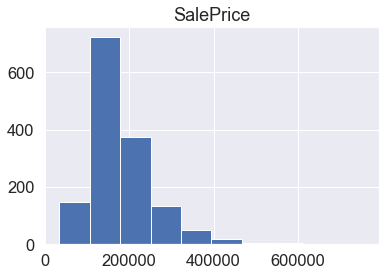

In [1236]:
# check distribution of sales price
train_df.hist(column='SalePrice')

array([[<AxesSubplot:title={'center':'LogPrice'}>]], dtype=object)

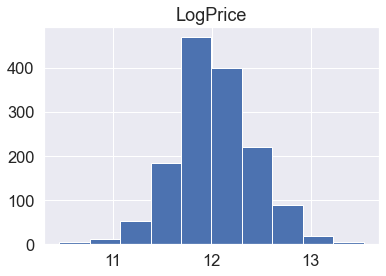

In [1237]:
# normalize sale price so that it can be evenly distributed
train_df['LogPrice'] = np.log(train_df.SalePrice)
train_df.hist(column='LogPrice')

In [1238]:
# check for more skewed columns
train_df.skew().sort_values(ascending=False).head(30)

Exterior2nd_CBlock      38.209946
MiscFeature_TenC        38.209946
Exterior1st_CBlock      38.209946
RoofMatl_Membran        38.209946
Exterior1st_ImStucc     38.209946
Condition2_RRAn         38.209946
Exterior1st_AsphShn     38.209946
RoofMatl_Roll           38.209946
RoofMatl_Metal          38.209946
Utilities_NoSeWa        38.209946
Condition2_PosA         38.209946
Electrical_Mix          38.209946
Condition2_RRAe         38.209946
RoofMatl_ClyTile        38.209946
Exterior2nd_Other       38.209946
Heating_Floor           38.209946
Heating_OthW            26.990701
MiscFeature_Othr        26.990701
Exterior1st_BrkComm     26.990701
RoofStyle_Shed          26.990701
SaleType_Con            26.990701
Condition2_PosN         26.990701
Exterior1st_Stone       26.990701
Neighborhood_Blueste    26.990701
Condition2_Artery       26.990701
MiscFeature_Gar2        26.990701
Condition1_RRNe         26.990701
Condition2_RRNn         26.990701
MiscVal                 24.476794
SaleType_Oth  

In [1239]:
# looking at correlation of numeric features to SalePrice column. 
# this will suggest which columns have a greater relationship with the SalePrice column 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['LogPrice']
corr = corr.iloc[1:]
corr = pd.DataFrame(corr, columns = ['Correlation'])

corr = corr[corr.Correlation > 0.50]
corr

,Correlation
SalePrice,0.948374
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
GarageFinish,0.604878
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570


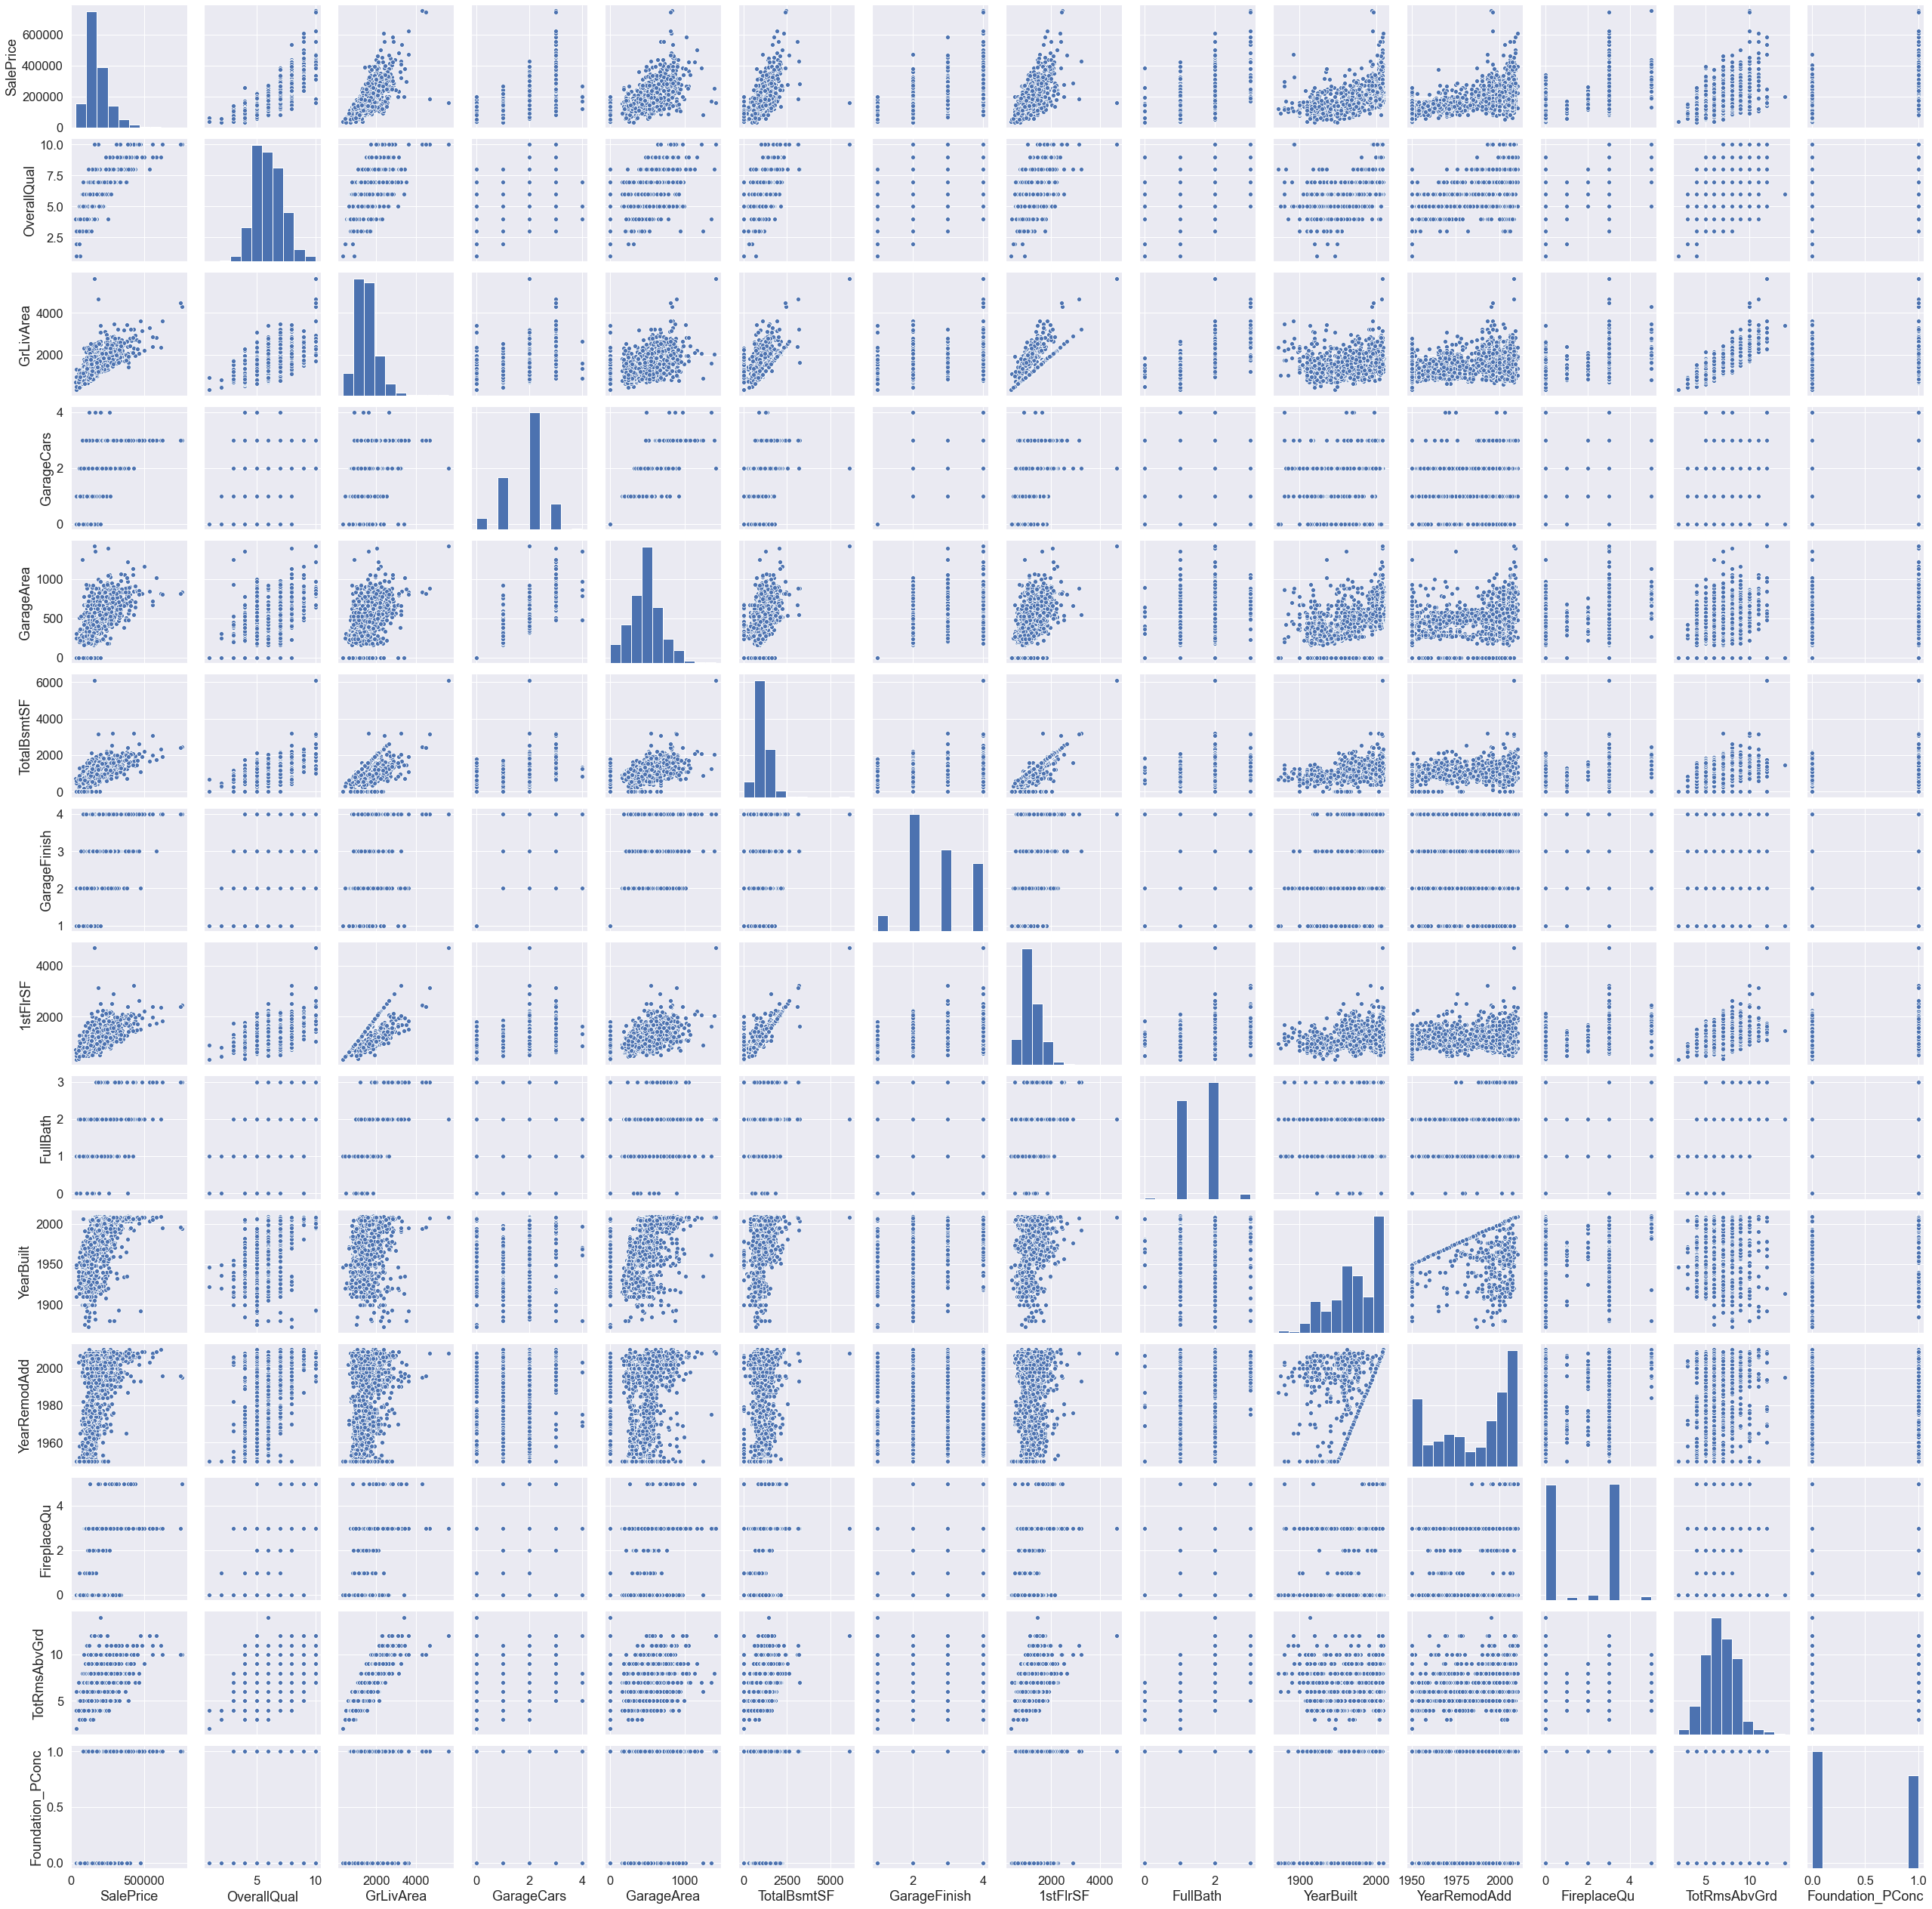

In [1240]:
cols = []
for ind in corr.index:
    cols.append(ind)

# create pair plot between columns that have correlation 50% and above
sns.pairplot(train_df[cols])

### Data Visualization (CAN BE DELETED):

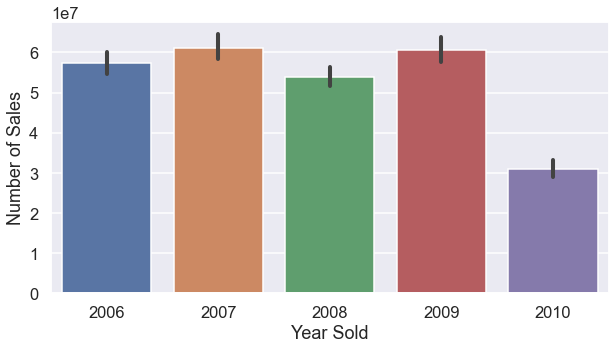

In [1241]:
#Count the number of houses sold in a year
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc='count')
#print(year_sold_pivot)

# Plotting the sum of sales per year
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=sum)
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.show()

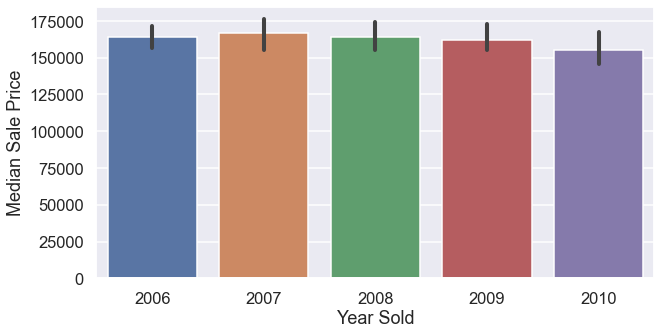

In [1242]:
# Plotting the median sale price for each year

#Checking the median price
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.median)
#print(year_sold_pivot)

sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=np.median)
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

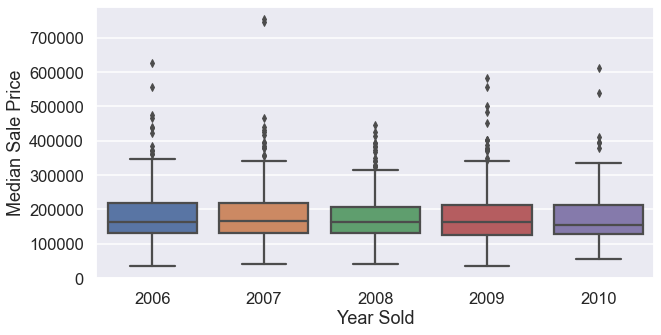

In [1243]:
#Displaying the median price for each year using box plot.  
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']])
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

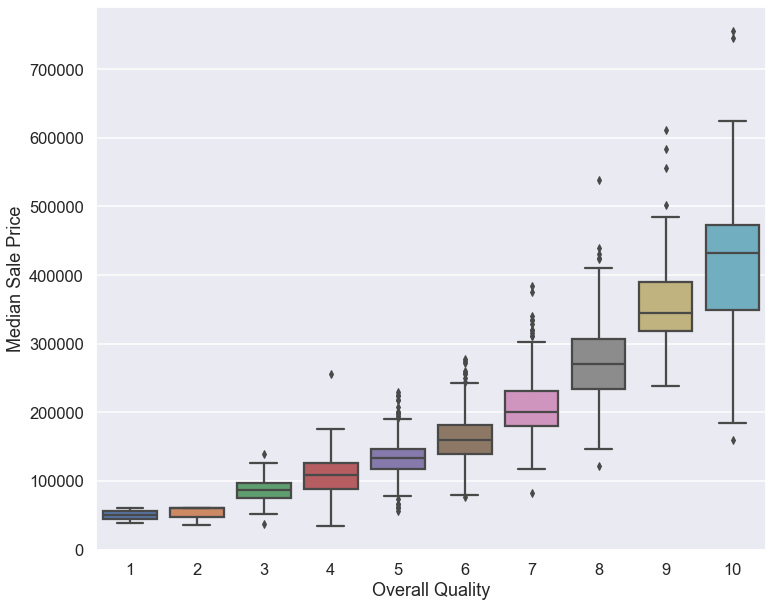

In [1244]:
# Displaying the median price based on overall quality of the house using box plot.
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(12,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df[['SalePrice', 'OverallQual']])
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

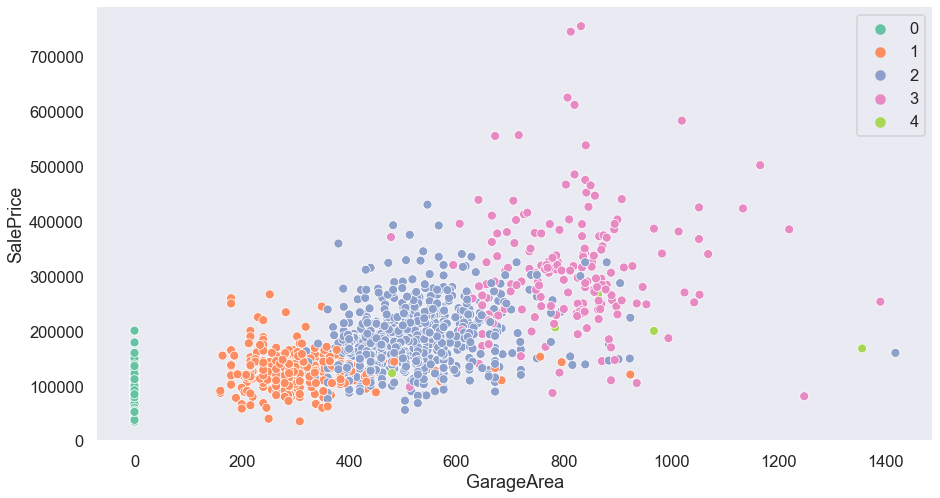

In [1245]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot GarageArea vs sale price of house considering the number of cars that can
# fit in the garage
sns.scatterplot(x='GarageArea', y='SalePrice', hue=train_df.GarageCars.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'GarageArea','GarageCars']])
plt.show()

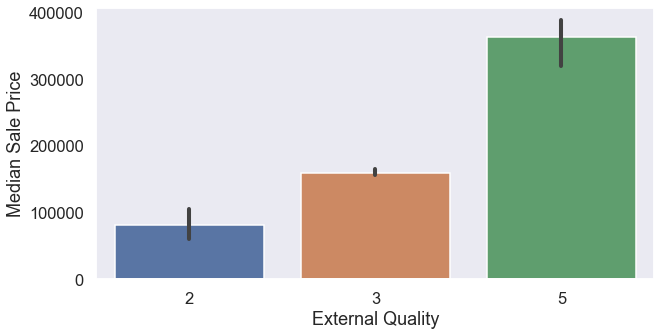

In [1246]:
# Plotting the median sale price based on external quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='ExterQual', y='SalePrice', data=train_df[['SalePrice', 'ExterQual']], estimator=np.median)
plt.xlabel('External Quality')
plt.ylabel('Median Sale Price')
plt.show()

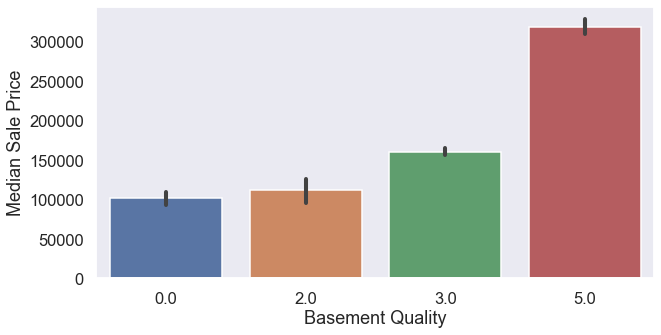

In [1247]:
# Plotting the median sale price based on basement quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='BsmtQual', y='SalePrice', data=train_df[['SalePrice', 'BsmtQual']], estimator=np.median)
plt.xlabel('Basement Quality')
plt.ylabel('Median Sale Price')
plt.show()

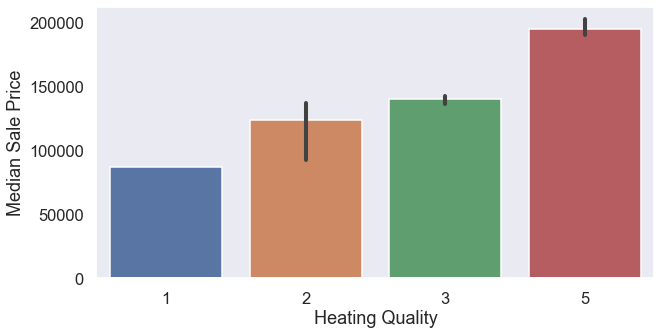

In [1248]:
# Plotting the median sale price based on heating and air conditioning quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='HeatingQC', y='SalePrice', data=train_df[['SalePrice', 'HeatingQC']], estimator=np.median)
plt.xlabel('Heating Quality')
plt.ylabel('Median Sale Price')
plt.show()

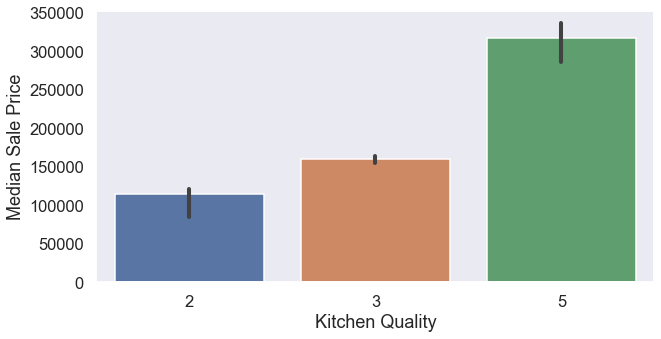

In [1249]:
# Plotting the median sale price based on kitchen quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df[['SalePrice', 'KitchenQual']], estimator=np.median)
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.show()

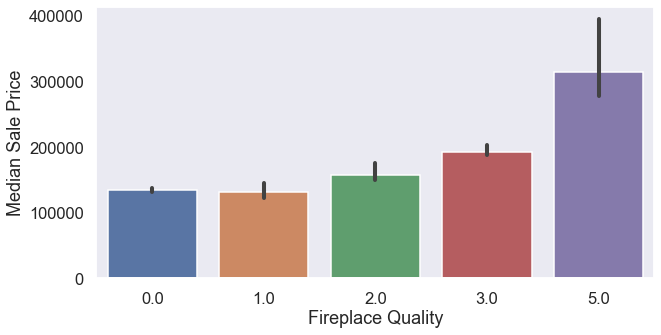

In [1250]:
# Plotting the median sale price based on fireplace quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='FireplaceQu', y='SalePrice', data=train_df[['SalePrice', 'FireplaceQu']], estimator=np.median)
plt.xlabel('Fireplace Quality')
plt.ylabel('Median Sale Price')
plt.show()

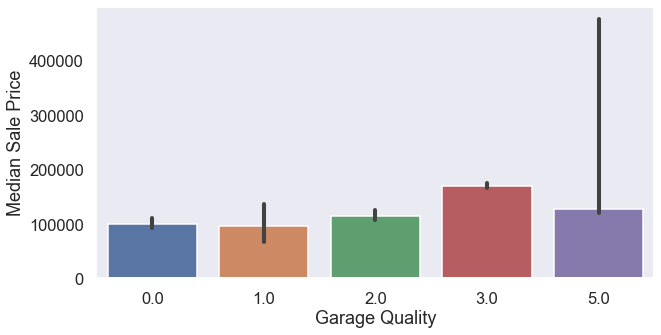

In [1251]:
# Plotting the median sale price based on garage quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='GarageQual', y='SalePrice', data=train_df[['SalePrice', 'GarageQual']], estimator=np.median)
plt.xlabel('Garage Quality')
plt.ylabel('Median Sale Price')
plt.show()

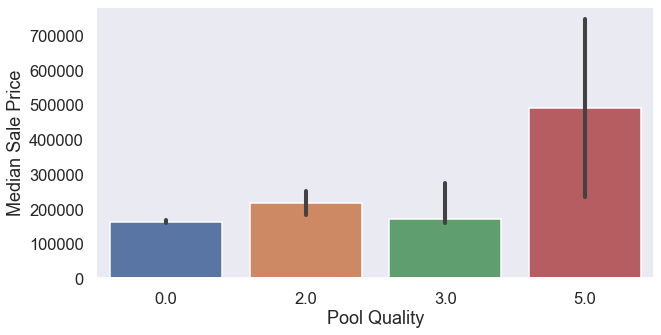

In [1252]:
# Plotting the median sale price based on pool quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='PoolQC', y='SalePrice', data=train_df[['SalePrice', 'PoolQC']], estimator=np.median)
plt.xlabel('Pool Quality')
plt.ylabel('Median Sale Price')
plt.show()

## Feature Engineering:

### Creating Features

In [1253]:
# sum of quality points.
train_df['SumQuality_'] = train_df.ExterQual + train_df.BsmtQual + train_df.HeatingQC + train_df.KitchenQual + train_df.GarageQual + train_df.FireplaceQu + train_df.GarageQual + train_df.PoolQC 
test_df['SumQuality_'] = test_df.ExterQual + test_df.BsmtQual + test_df.HeatingQC + test_df.KitchenQual + test_df.GarageQual + test_df.FireplaceQu + test_df.GarageQual + test_df.PoolQC 
              
#print(train_df['SumQuality'])

# sum of quality points, removing less correlated features (< 0.5).
train_df['SumMIQ_'] = train_df.ExterQual + train_df.BsmtQual + train_df.KitchenQual + train_df.FireplaceQu + train_df.GarageQual
test_df['SumMIQ_'] = test_df.ExterQual + test_df.BsmtQual + test_df.KitchenQual + test_df.FireplaceQu + test_df.GarageQual

In [1254]:
# Garage area per car
train_df['GarageAreaPerCar_'] = train_df.GarageArea / train_df.GarageCars 
train_df.GarageAreaPerCar_.fillna(0, inplace=True) 

test_df['GarageAreaPerCar_'] = test_df.GarageArea / test_df.GarageCars 
test_df.GarageAreaPerCar_.fillna(0, inplace=True) 

#Age of garage
train_df['GarageAge_'] = train_df.YrSold - train_df.GarageYrBlt
test_df['GarageAge_'] = test_df.YrSold - test_df.GarageYrBlt

#Age of house
train_df['Age_'] = train_df.YrSold - train_df.YearBuilt
test_df['Age_'] = test_df.YrSold - test_df.YearBuilt

#Age of house remodelling
train_df['RemodelAge_'] = train_df.YrSold - train_df.YearRemodAdd
test_df['RemodelAge_'] = test_df.YrSold - test_df.YearRemodAdd

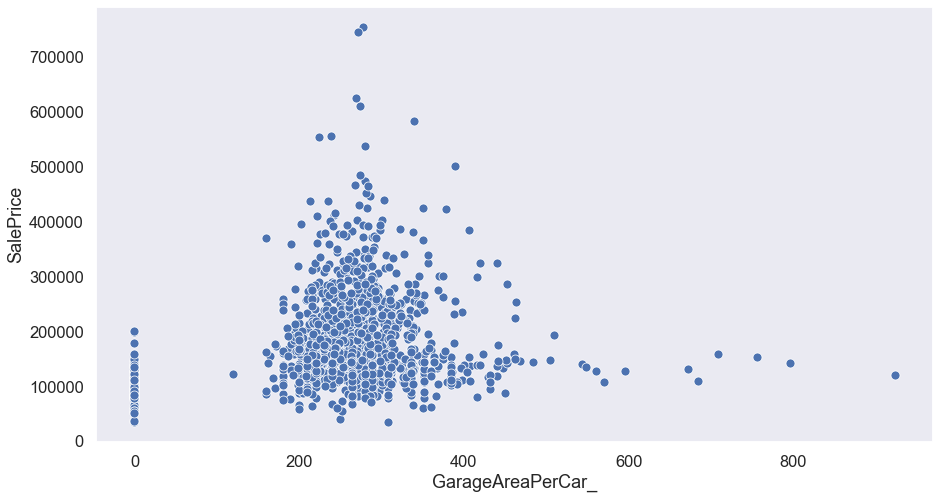

In [1255]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot garage area per car vs sale price of house
sns.scatterplot(x='GarageAreaPerCar_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'GarageAreaPerCar_']])
plt.show()

In [1256]:
# summing developed areas (indoor and outdoor)
train_df['IndoorArea_'] = train_df.GrLivArea + train_df.TotalBsmtSF + train_df.GarageArea
test_df['IndoorArea_'] = test_df.GrLivArea + test_df.TotalBsmtSF + test_df.GarageArea

train_df['OutdoorArea_'] = train_df.WoodDeckSF + train_df.OpenPorchSF + train_df.EnclosedPorch + train_df['3SsnPorch'] + train_df.ScreenPorch + train_df.MasVnrArea + train_df.PoolArea
test_df['OutdoorArea_'] = test_df.WoodDeckSF + test_df.OpenPorchSF + test_df.EnclosedPorch + test_df['3SsnPorch'] + test_df.ScreenPorch + test_df.MasVnrArea + test_df.PoolArea

train_df['DevelopedArea_'] = train_df.IndoorArea_+ train_df.OutdoorArea_
test_df['DevelopedArea_'] = test_df.IndoorArea_ + test_df.OutdoorArea_

train_df['LotAreaBySlope_'] = train_df.LotArea * train_df.LandSlope
test_df['LotAreaBySlope_'] = test_df.LotArea * test_df.LandSlope

train_df['LotAreaByContour_'] = train_df.LotArea * train_df.LandContour
test_df['LotAreaByContour_'] = test_df.LotArea * test_df.LandContour

#train_df['InsideOutsideRatio'] = train_df.IndoorArea / train_df.OutdoorArea

#train_df['FloorRatio'] = train_df['2ndFlrSF'] / train_df['1stFlrSF']

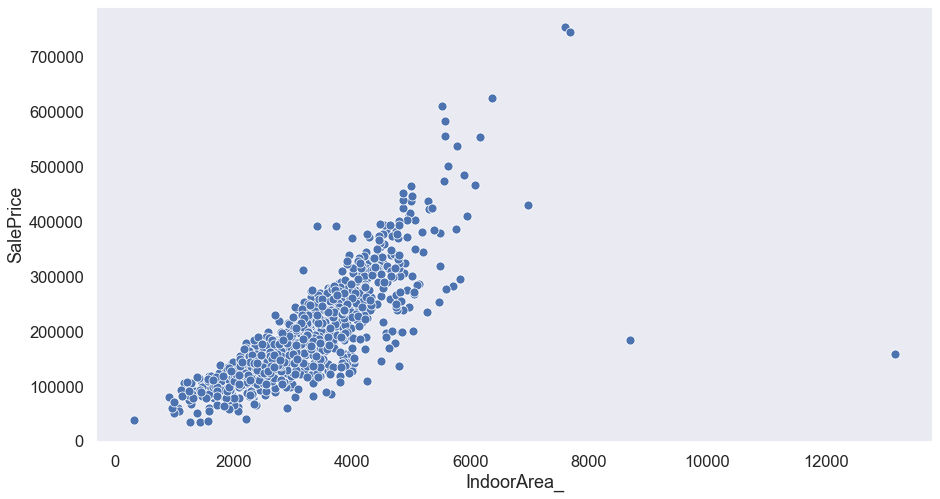

In [1257]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total indoor area vs sale price of house
sns.scatterplot(x='IndoorArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'IndoorArea_']])
plt.show()

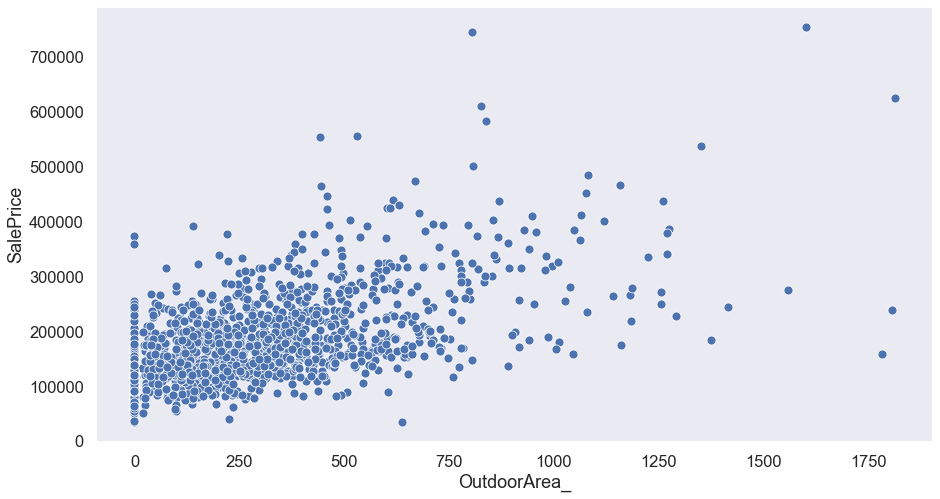

In [1258]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total outdoor area vs sale price of house considering the building type
sns.scatterplot(x='OutdoorArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'OutdoorArea_']])
plt.show()

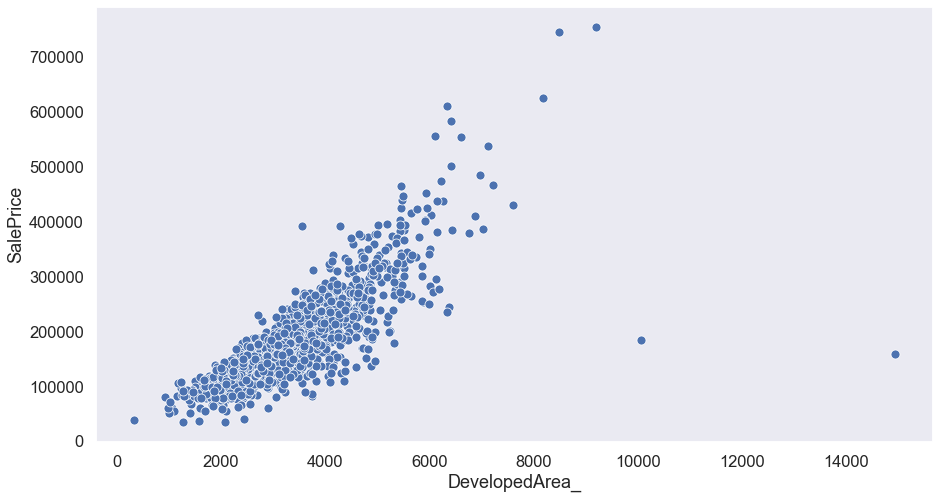

In [1259]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total area that has been built out (nothing has been built on it) vs sale price of house
# considering the building type
sns.scatterplot(x='DevelopedArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'DevelopedArea_']])
plt.show()

In [1260]:
train_df['IsNew_'] = train_df.Age_.map(lambda x: 0 if x > 0 else 1)
test_df['IsNew_'] = test_df.Age_.map(lambda x: 0 if x > 0 else 1)

train_df['IsRemodelled_'] = train_df.RemodelAge_.map(lambda x: 0 if x > 0 else 1)
test_df['IsRemodelled_'] = test_df.RemodelAge_.map(lambda x: 0 if x > 0 else 1)

In [1261]:
train_df['TotalBathRms_'] = train_df.FullBath + (train_df.HalfBath * 0.5) + train_df.BsmtFullBath + (train_df.BsmtHalfBath * 0.5)
    
test_df['TotalBathRms_'] = test_df.FullBath + (test_df.HalfBath * 0.5) + test_df.BsmtFullBath + (test_df.BsmtHalfBath * 0.5)

### Selecting Features

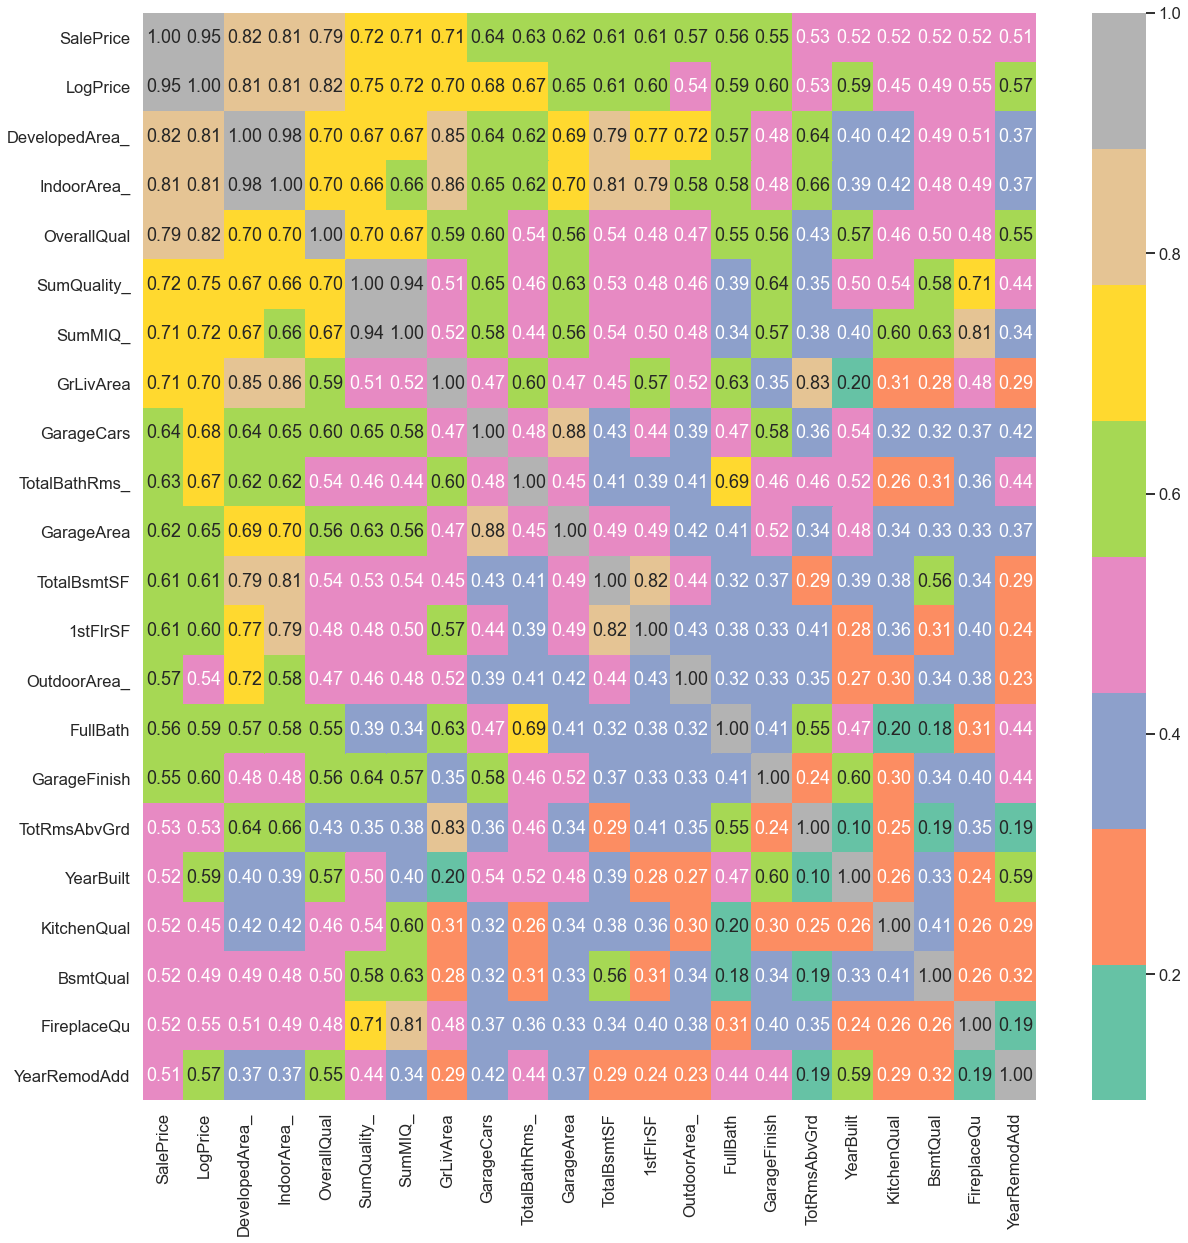

In [1262]:
corr = train_df.corr()
highest_corr_cols = corr[abs((corr.SalePrice)>=.50)].SalePrice.sort_values(ascending=False).keys()
highest_corr = corr.loc[highest_corr_cols, highest_corr_cols]
plt.figure(figsize=(20, 20))
sns.heatmap(highest_corr, cmap='Set2', annot=True, fmt=".2f")
sns.set(font_scale=1.5)
plt.show()
del corr, highest_corr

In [1263]:
#train_df.to_csv('output.csv')

In [1264]:
features = list(['SalePrice', 'SumQuality_', 'SumMIQ_', 'GarageAge_', 'GarageAreaPerCar_', 'Age_', 'RemodelAge_',
                 'IndoorArea_', 'OutdoorArea_', 'LotAreaBySlope_', 'LotAreaByContour_',
                 'DevelopedArea_', 'IsNew_', 'IsRemodelled_', 'TotalBathRms_'])
corr = train_df[features].corr()['SalePrice']
print(corr)

SalePrice            1.000000
SumQuality_          0.721649
SumMIQ_              0.710811
GarageAge_          -0.261441
GarageAreaPerCar_    0.158189
Age_                -0.523350
RemodelAge_         -0.509079
IndoorArea_          0.807518
OutdoorArea_         0.569425
LotAreaBySlope_      0.375575
LotAreaByContour_    0.354396
DevelopedArea_       0.816964
IsNew_               0.224807
IsRemodelled_        0.335975
TotalBathRms_        0.631731
Name: SalePrice, dtype: float64


In [1265]:
# Revisitng correlation with addition of new features 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['SalePrice']
corr = pd.DataFrame(corr, columns = ['Correlation'])
corr.Correlation.head(50)

#corr = corr[corr.Correlation > 0.50]
#corr

SalePrice               1.000000
LogPrice                0.948374
DevelopedArea_          0.816964
IndoorArea_             0.807518
OverallQual             0.790982
SumQuality_             0.721649
SumMIQ_                 0.710811
GrLivArea               0.708624
GarageCars              0.640409
TotalBathRms_           0.631731
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
OutdoorArea_            0.569425
FullBath                0.560664
GarageFinish            0.549247
TotRmsAbvGrd            0.533723
Age_                    0.523350
YearBuilt               0.522897
KitchenQual             0.521284
BsmtQual                0.521268
FireplaceQu             0.518825
RemodelAge_             0.509079
YearRemodAdd            0.507101
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
ExterQual               0.463465
HeatingQC               0.437640
Neighborhood_NridgHt    0.402149
BsmtFinSF1

## Modelling

In [1266]:
train_df.reset_index(drop=True, inplace=True)

#y = np.log(train_df['SalePrice'])

y = train_df['SalePrice']
X = train_df.drop(['SalePrice', 'LogPrice'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression:

In [1267]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# The MAPE: 0 is perfect prediction
print('MAPE: %.2f'
      % np.mean(np.abs((y_test - y_pred) / y_test)))

lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

# The mean squared error
print('Mean squared error for scaled: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination for scaled: %.2f'
      % r2_score(y_test, y_pred))

# The MAPE: 0 is perfect prediction
print('MAPE for scaled: %.2f'
      % np.mean(np.abs((y_test - y_pred) / y_test)))


Coefficients: 
 [ 1.43845071e+01  4.14838709e+01 -1.57748487e-02  4.29662777e+02
  8.73868516e+02 -1.06239636e+04  8.43128550e+03  4.31987591e+03
  2.12871445e+02  1.25217873e+02 -4.05325085e+01  5.81535281e+03
 -4.91172069e+03  2.00890198e+03 -9.98569471e+03  5.18920416e+03
  5.58498184e+02  7.33566817e-01 -3.14839013e+02 -5.03301980e+00
 -1.23570015e+01 -1.66564526e+01  9.07550167e+03 -2.15588228e+03
 -1.56600430e+01  6.43532605e+00  1.06223744e+01  1.39765690e+00
  1.04073097e+03 -1.82641471e+02  2.45715750e+03  9.80410778e+02
 -3.77334294e+03 -2.04618186e+04  3.35848715e+03  3.13896801e+03
  4.83321827e+03  6.06623506e+03 -7.34674195e+03  6.89877515e+01
 -6.07525252e+02 -9.53858754e+03  2.54636430e+01  9.40606068e+03
 -2.04299591e+03  7.97004672e+02 -5.50359474e+01 -6.37865111e+01
 -4.45974259e+01 -1.73074728e+01 -5.86306142e+00  2.52950718e+02
 -3.88511706e+04  4.11619888e+02  1.36850806e+00 -3.46851263e+02
  1.56859697e+02  1.46441752e+03 -2.35096261e+04  1.61377380e+04
  1.09040

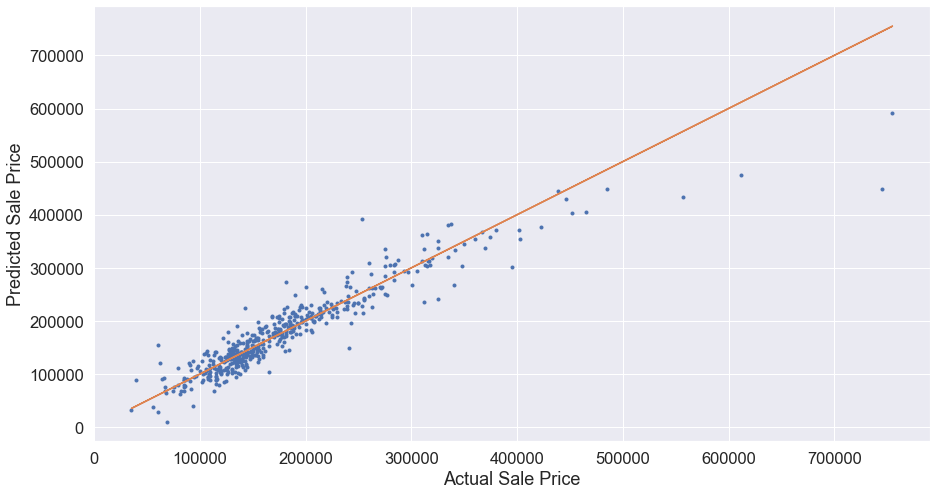

In [1268]:
# plot prediction and actual data
plt.figure(figsize=(15,8))
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = y_test
y = x
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot(x, y)
plt.show()

### Kernel Ridge Regression

In [1269]:
kernelRidge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernelRidge_model = kernelRidge.fit(X_train,y_train)
y_pred = kernelRidge_model.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The MAPE: 0 is perfect prediction
print('MAPE: %.2f'
      % np.mean(np.abs((y_test - y_pred) / y_test)))

Mean squared error: 26836406040.44
MAPE: 0.49


C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.73083e-20): result may not be accurate.
  overwrite_a=False)


In [1270]:
#Independent Variable
X = train_df.loc[:,~train_df.columns.isin(['SalePrice'])]
X_scaled = preprocessing.scale(X)

#Dependent Variable
y = train_df.loc[:,'SalePrice']

# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import VarianceThreshold

# X = VarianceThreshold(threshold=(.8 * (1 - .8)))
# X.fit_transform(XData)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)

### Data normalization and standardization

In [1271]:
#Data normalization and standardization
rescaledX_train = preprocessing.scale(X_train)
rescaledX_test = preprocessing.scale(X_test)

### Logestic Regression

In [1272]:
logReg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=300000)
logReg.fit(rescaledX_train,y_train)

LogisticRegression(max_iter=300000, random_state=42)

In [1273]:
#Model1 Evalution

y_pred = logReg.predict(rescaledX_test)
print('Accuracy of logistic regression classifier:', accuracy_score(y_test,y_pred))
# print('Roc Auc Score:',roc_auc_score(y_test,y_pred))
print('Confusion Matrix of the logreg model: ',confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier: 0.005136986301369863
Confusion Matrix of the logreg model:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


### SVM

In [1274]:
classification_svm =svm.SVC()
classification_svm.fit(rescaledX_train,y_train)

SVC()

In [1275]:
y_pred = classification_svm.predict(rescaledX_test)

print('Accuracy of SVM classifier:', accuracy_score(y_test,y_pred))
# print('Roc Auc Score:',roc_auc_score(y_test,y_pred))
print('Confusion Matrix of the SVM model: ',confusion_matrix(y_test,y_pred))

Accuracy of SVM classifier: 0.011986301369863013
Confusion Matrix of the SVM model:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### KNN

In [1276]:
train_filled_knn = KNN(k=1).fit_transform(train_df)   
train_df = pd.DataFrame(train_filled_knn, columns = list(train_df.columns))
train_df.head()

test_filled_knn = KNN(k=1).fit_transform(test_df)   
test_df = pd.DataFrame(test_filled_knn, columns = list(test_df.columns))
test_df.head()

NameError: name 'KNN' is not defined